# Solar Panel Detection

This notebook demonstrates how to use the geoai package for solar panel detection using a pre-trained model.

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/solar_panel_detection.ipynb)

## Install package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [2]:
pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.8/242.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.2/589.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import libraries

In [3]:
import geoai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Download sample data

In [56]:
raster_url = "veszprem_EOV.tif"
raster_path = "veszprem_EOV.tif"

In [5]:

print(f'{raster_path=}')

raster_url='https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif'
raster_path='solar_panels_davis_ca.tif'


===== RASTER INFORMATION: veszprem_EOV.tif =====
Driver: GTiff
Dimensions: 850 x 850 pixels
Number of bands: 3
Data type: uint8
Coordinate Reference System: EPSG:23700
Georeferenced Bounds: BoundingBox(left=570000.05, bottom=219999.95, right=570085.05, top=220084.95)
Pixel Resolution: 0.1, 0.1
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 17.00
  Max: 235.00
  Mean: 108.96
  Std Dev: 50.35
Band 2:
  Min: 31.00
  Max: 236.00
  Mean: 115.63
  Std Dev: 37.67
Band 3:
  Min: 27.00
  Max: 238.00
  Mean: 104.70
  Std Dev: 39.68


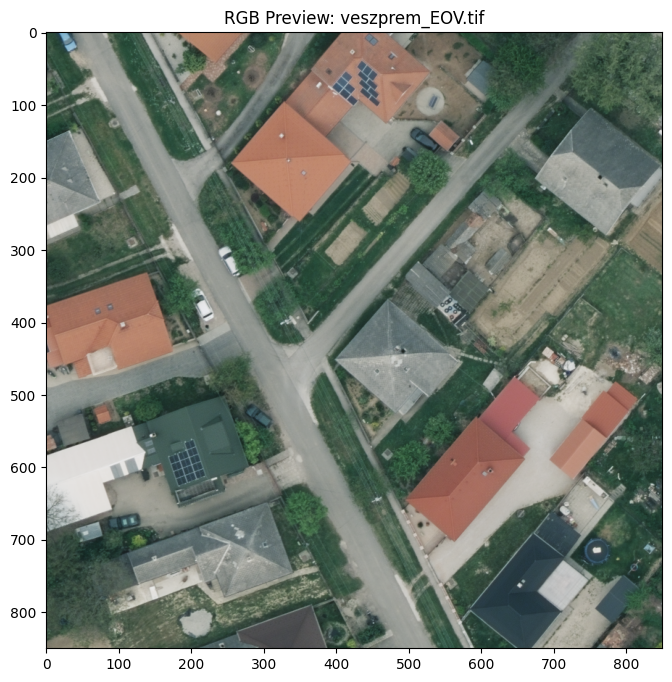

In [49]:
geoai.print_raster_info('veszprem_EOV.tif')

## Visualize data

In [50]:
geoai.view_raster('veszprem_EOV.tif')

Map(center=[47.319537, 17.989733], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## Initialize model

In [9]:
detector = geoai.SolarPanelDetector()

Model path not specified, downloading from Hugging Face...


solar_panel_detection.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Model downloaded to: /root/.cache/huggingface/hub/models--giswqs--geoai/snapshots/089548329c81f128fa12576663e7abdedb5cfa0e/solar_panel_detection.pth
Model loaded successfully


## Generate masks

In [53]:
output_path = "veszprem_EOV_masks.tif"

In [54]:
masks_path = detector.generate_masks(
    'veszprem_EOV.tif',
    output_path=output_path,
    confidence_threshold=0.1,
    mask_threshold=0.5,
    min_object_area=100,
    overlap=0.25,
    chip_size=(400, 400),
    batch_size=4,
    verbose=False,
)

Dataset initialized with 3 rows and 3 columns of chips
Image dimensions: 850 x 850 pixels
Chip size: 400 x 400 pixels
Overlap: 25.0% (stride_x=300, stride_y=300)
CRS: EPSG:23700
Processing raster with 3 batches


100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

Masks with confidence values saved to veszprem_EOV_masks.tif


## Visualize masks

In [57]:
geoai.view_raster(
    output_path,
    indexes=[2],
    colormap="autumn",
    layer_name="Solar Panels",
    basemap=raster_url,
)

Map(center=[47.319537, 17.989733], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## Vectorize masks

In [37]:
gdf = geoai.orthogonalize(
    input_path=masks_path, output_path="veszprem_EOV_masks.geojson", epsilon=0.2
)

Processing 3 features...


Converting features: 100%|██████████| 3/3 [00:00<00:00, 40.21shape/s]

Saving to solar_panel_masks.geojson...


Done!


## Visualize initial results

In [38]:
geoai.view_vector_interactive(gdf, tiles=raster_url)

## Calculate geometric properties

In [39]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

ValueError: GeoDataFrame must have a defined coordinate reference system (CRS)

In [40]:
print(len(gdf))

2


In [41]:
geoai.view_vector_interactive(gdf, column="elongation", tiles=raster_url)

KeyError: 'elongation'

## Filter results

In [42]:
gdf_filter = gdf[(gdf["elongation"] < 10) & (gdf["area_m2"] > 5)]
print(len(gdf_filter))

KeyError: 'elongation'

## Visualize final results

In [43]:
geoai.view_vector_interactive(gdf_filter, column="area_m2", tiles=raster_url)

NameError: name 'gdf_filter' is not defined

In [ ]:
geoai.view_vector_interactive(
    gdf_filter, style_kwds={"color": "red", "fillOpacity": 0}, tiles=raster_url
)

In [ ]:
gdf_filter["area_m2"].hist()

In [ ]:
gdf_filter["area_m2"].describe()

In [ ]:
gdf_filter["area_m2"].sum()

## Save results

In [ ]:
gdf_filter.to_file("solar_panels.geojson")

![image](https://github.com/user-attachments/assets/a38925dc-b840-42b0-a926-326ef99b181c)